<a href="https://colab.research.google.com/github/jessigatma/Globant_Exercises/blob/main/purchases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purchases

## 1. Problema

**Objetivo**: Descubrir transacciones inusuales

## 2. Obtención de Datos

En el siguiente link hay una colección de transacciones de compra de tarjeta de crédito del Ayuntamiento de Birminham https://data.birmingham.gov.uk/dataset/purchase-card-transactions



Los datos se enuentran en formato xls, son un total de 43 archivos del año 2014 al 2017. Estos archivos los juntamos en uno sólo. Se guardará en un csv llamado *total_purchase.csv*

In [ ]:
import pandas as pd
import os
import glob

In [ ]:
path_files = './PURCHASES/'
xls_files = glob.glob(os.path.join(path_files, "*.xls"))
column_list = ['TRANS DATE', 'TRANS VAT DESC', 'ORIGINAL GROSS AMT', 'MERCHANT NAME', 'CARD NUMBER',  'TRANS CAC CODE 1', 'TRANS CAC DESC 1', 'TRANS CAC CODE 2', 'TRANS CAC DESC 2','TRANS CAC CODE 3', 'Directorate']
dfs =[]

for file in xls_files:
    df = pd.read_excel(file)
    df.rename({'Directorate ':'Directorate', 'Directorates':'Directorate', 'Unnamed: 10':'Directorate'}, axis='columns',inplace=True)
    df = df[column_list]
    dfs.append(df)

result = pd.concat(dfs)
result.to_csv('total_purchase.csv',index=False)
result.shape


Ya que se tiene el archivo, es momento de entender los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_result = pd.read_csv('/content/drive/MyDrive/total_purchase.csv')
df_result.head()

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,2015-05-06,VR,38.28,shell corrida 108,************0541,K020,Vehicle Fuel,RV12T,"Shakti Elders Dce, 73 Conybere St, B12",A00,Adult & Communities
1,2015-05-14,VR,34.23,tex city sstn,************0541,K020,Vehicle Fuel,RV12T,"Shakti Elders Dce, 73 Conybere St, B12",A00,Adult & Communities
2,2015-05-21,VR,42.61,tex city sstn,************0541,K020,Vehicle Fuel,RV12T,"Shakti Elders Dce, 73 Conybere St, B12",A00,Adult & Communities
3,2015-05-29,VR,43.57,tex city sstn,************0541,K020,Vehicle Fuel,RV12T,"Shakti Elders Dce, 73 Conybere St, B12",A00,Adult & Communities
4,2015-05-07,VR,54.17,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities


Se observará el tipo de datos que se tiene

In [ ]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180269 entries, 0 to 180268
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TRANS DATE          180268 non-null  object 
 1   TRANS VAT DESC      171054 non-null  object 
 2   ORIGINAL GROSS AMT  180268 non-null  float64
 3   MERCHANT NAME       180268 non-null  object 
 4   CARD NUMBER         180268 non-null  object 
 5   TRANS CAC CODE 1    180168 non-null  object 
 6   TRANS CAC DESC 1    180168 non-null  object 
 7   TRANS CAC CODE 2    180041 non-null  object 
 8   TRANS CAC DESC 2    180041 non-null  object 
 9   TRANS CAC CODE 3    179985 non-null  object 
 10  Directorate         179531 non-null  object 
dtypes: float64(1), object(10)
memory usage: 15.1+ MB


serva que hay varios valores nulos y que *TRANS DATE* que debería ser fecha está como objeto. Se cambiará al formato fecha

In [ ]:
df_result['TRANS DATE'] = pd.to_datetime(df_result['TRANS DATE'])

In [ ]:
print('Fecha máxima: ',df_result['TRANS DATE'].max())
print('Fecha mínima: ', df_result['TRANS DATE'].min())

Fecha máxima:  2017-12-01 00:00:00
Fecha mínima:  2013-11-12 00:00:00


Para dar un vistazo a los valores con los que se cuenta, se recorrerá cada una de las columnas 

In [ ]:
for columna in df_result.columns:
  print(f'====== {columna} ========')
  valores = df_result[columna].value_counts()
  print(valores)

====== TRANS DATE ========
2014-06-11    473
2014-06-06    470
2014-06-16    452
2014-06-24    444
2014-06-17    438
             ... 
2013-11-12      1
2015-04-27      1
2014-05-02      1
2015-12-25      1
2014-05-28      1
Name: TRANS DATE, Length: 1293, dtype: int64
====== TRANS VAT DESC ========
VR       85601
VZ       83839
VL         650
VE         641
VS         288
VT          30
6.65%        5
Name: TRANS VAT DESC, dtype: int64
====== ORIGINAL GROSS AMT ========
 50.00     1226
 10.00     1209
 3.00      1076
 15.00     1061
 20.00     1053
           ... 
 552.85       1
 595.10       1
 587.50       1
-489.00       1
 288.13       1
Name: ORIGINAL GROSS AMT, Length: 31737, dtype: int64
====== MERCHANT NAME ========
amazon uk marketplace    14381
amazon uk retail          6022
travelodge gb0000         4890
amazon mktplce eu-uk      4664
travelodge website        4087
                         ...  
paypal taxdiscolis           1
paypal trzuskowski           1
paypal zroxinter

No se cuenta con un ID que pueda sugerir que es el mismo cliente, esto con la intención de que se pudiera rastrear sus transacciones de manera individual.

Se pudiera ver si existe un tipo de relación entre VAT DESC y el monto de la transacción. 

Sería interesante observar cuáles son los tipos de negocio que más transacciones tienen y si hay un negocio en particular que cuente con más anomalías ó si se presenta la anomalía de forma aleatoria.

¿Cómo será el comportamiento de las transacciones? Se esperaría que la gasolina fuera a un ritmo constante, en cambio, productos no básicos pudieran crecer sus transacciones en épocas especiales como Navidad. 




¿Cuánto es el monto promedio por transacción? ¿Cuánto su desviación estándar?

In [ ]:
df_result.describe()

,ORIGINAL GROSS AMT
count,180268.000000
mean,173.276633
std,2158.197288
min,-486980.090000
25%,12.790000
50%,40.400000
75%,91.600000
max,280102.230000


## 3. Limpieza de Datos

Para la limpieza de datos se comenzará dejando las columnas que serán útiles para lograr el objetivo de detección de anomalías. Y se agregará otra columna de Mes

In [ ]:
from datetime import datetime as dt 

df_result = df_result[['TRANS DATE', 'ORIGINAL GROSS AMT', 'TRANS CAC DESC 1']]
df_result['MONTH'] = df_result['TRANS DATE'].apply(lambda x: x.month)
df_result.head()

,TRANS DATE,ORIGINAL GROSS AMT,TRANS CAC DESC 1,MONTH
0,2015-05-06,38.28,Vehicle Fuel,5.0
1,2015-05-14,34.23,Vehicle Fuel,5.0
2,2015-05-21,42.61,Vehicle Fuel,5.0
3,2015-05-29,43.57,Vehicle Fuel,5.0
4,2015-05-07,54.17,Vehicle Fuel,5.0


## Análisis de Datos

Una vez que se tiene el dataset deseado, se quiere observar cómo actúan los principales tipos de negocio por mes. 

Para conocer cuales son los principales tipos de negocio de acuerdo a su monto se realiza lo siguiente:

In [ ]:
df_result['TRANS CAC DESC 1'].value_counts()[:5]

Equip Operational     33476
Vehicle Fuel          22460
Purchases Food        20064
Books                 11069
Supplies & Sev Mic    10506
Name: TRANS CAC DESC 1, dtype: int64

In [ ]:
df_result_class = df_result[(df_result['TRANS CAC DESC 1']=='Equip Operational')|(df_result['TRANS CAC DESC 1']=='Vehicle Fuel') | (df_result['TRANS CAC DESC 1']=='Purchases Food')|(df_result['TRANS CAC DESC 1']=='Books')|(df_result['TRANS CAC DESC 1']=='Supplies & Sev Mic')]
df_result_class.shape

(97575, 4)

Una vez que se obtiene este nuevo dataset con estos pocos tipos de negocio, se quisiera encontrar comportamientos que se relacionen entre ellos ó que sean estacionales. 
Se agrupará por mes y por tipo de negocio de 2014 a 2016

In [ ]:
df_month = df_result_class[df_result_class['TRANS DATE'].isin(pd.date_range('2014-01-01','2014-12-31'))]

df1 = df_month.groupby(['TRANS CAC DESC 1','MONTH'],as_index=False).sum()

dfT14 = pd.DataFrame()

for columna in df1['TRANS CAC DESC 1'].unique():
  df2 = df1[df1['TRANS CAC DESC 1']==columna].set_index('MONTH')
  df2.rename(columns={'ORIGINAL GROSS AMT':columna},inplace=True)
  dfT14 = pd.concat([dfT14,df2],axis=1)
dfT14.drop('TRANS CAC DESC 1',axis=1,inplace=True)

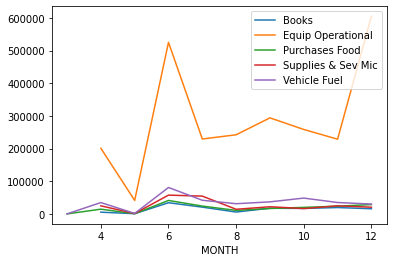

In [ ]:
dfT14.plot()

In [ ]:
df_2015 = df_result_class[df_result_class['TRANS DATE'].isin(pd.date_range('2015-01-01','2015-12-31'))]
df_2015['MONTH'] = df_2015['TRANS DATE'].apply(lambda x: x.month)

df15 = df_2015.groupby(['TRANS CAC DESC 1','MONTH'],as_index=False).sum()

dfT15 = pd.DataFrame()

for columna in df15['TRANS CAC DESC 1'].unique():
  d15 = df15[df15['TRANS CAC DESC 1']==columna].set_index('MONTH')
  d15.rename(columns={'ORIGINAL GROSS AMT':columna},inplace=True)
  dfT15 = pd.concat([dfT15,d15],axis=1)

dfT15.drop('TRANS CAC DESC 1',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


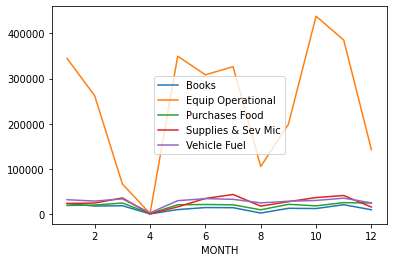

In [ ]:
dfT15.plot()

In [ ]:
df_2016 = df_result_class[df_result_class['TRANS DATE'].isin(pd.date_range('2016-01-01','2016-12-31'))]
df_2016['MONTH'] = df_2016['TRANS DATE'].apply(lambda x: x.month)
#df_2016['Directorate'].replace({'Adults':'Adults & Communities','Adults & Comms':'Adults & Communities','CYP&F  ':'CYP&F','CYO&F':'CYP&F','CYP&F ':'CYP&F','CYP&F SCHOOLS':'CYP&F', 'CYP&F Schools':'CYP&F', 'Local Services':'Local services', 'DEVELOPMENT':'Development','Adult & Communities':'Adults & Communities'}, inplace=True)


df16 = df_2016.groupby(['TRANS CAC DESC 1','MONTH'],as_index=False).sum()

dfT16 = pd.DataFrame()

for columna in df16['TRANS CAC DESC 1'].unique():
  d16 = df16[df16['TRANS CAC DESC 1']==columna].set_index('MONTH')
  d16.rename(columns={'ORIGINAL GROSS AMT':columna},inplace=True)
  dfT16 = pd.concat([dfT16,d16],axis=1)

dfT16.drop('TRANS CAC DESC 1',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


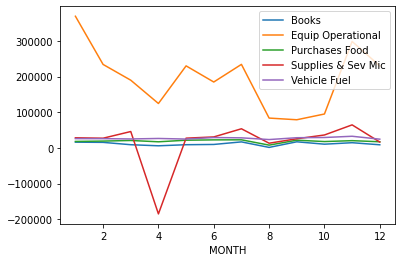

In [ ]:
dfT16.plot()

Se puede observar que *Equip Operational* rebasa por mucho a cualquiera de los otros rubros, lo que no nos permite distinguir el comportamiento de los otros casos. 

In [ ]:
df_result_class = df_result_class[df_result_class['TRANS CAC DESC 1']!='Equip Operational']

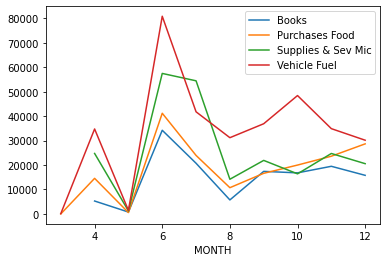

In [ ]:
df_month = df_result_class[df_result_class['TRANS DATE'].isin(pd.date_range('2014-01-01','2014-12-31'))]

df1 = df_month.groupby(['TRANS CAC DESC 1','MONTH'],as_index=False).sum()

dfT14 = pd.DataFrame()

for columna in df1['TRANS CAC DESC 1'].unique():
  df2 = df1[df1['TRANS CAC DESC 1']==columna].set_index('MONTH')
  df2.rename(columns={'ORIGINAL GROSS AMT':columna},inplace=True)
  dfT14 = pd.concat([dfT14,df2],axis=1)
dfT14.drop('TRANS CAC DESC 1',axis=1,inplace=True)
dfT14.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


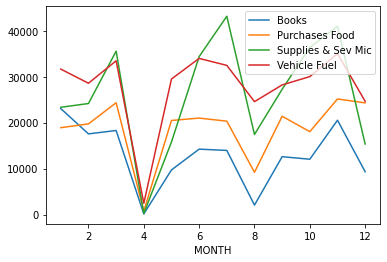

In [ ]:
df_2015 = df_result_class[df_result_class['TRANS DATE'].isin(pd.date_range('2015-01-01','2015-12-31'))]
df_2015['MONTH'] = df_2015['TRANS DATE'].apply(lambda x: x.month)

df15 = df_2015.groupby(['TRANS CAC DESC 1','MONTH'],as_index=False).sum()

dfT15 = pd.DataFrame()

for columna in df15['TRANS CAC DESC 1'].unique():
  d15 = df15[df15['TRANS CAC DESC 1']==columna].set_index('MONTH')
  d15.rename(columns={'ORIGINAL GROSS AMT':columna},inplace=True)
  dfT15 = pd.concat([dfT15,d15],axis=1)

dfT15.drop('TRANS CAC DESC 1',axis=1,inplace=True)
dfT15.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


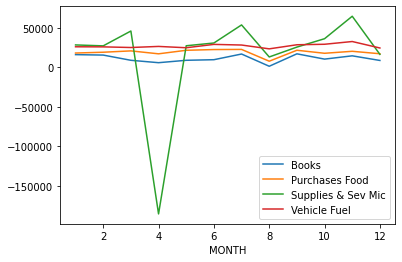

In [ ]:
df_2016 = df_result_class[df_result_class['TRANS DATE'].isin(pd.date_range('2016-01-01','2016-12-31'))]
df_2016['MONTH'] = df_2016['TRANS DATE'].apply(lambda x: x.month)
#df_2016['Directorate'].replace({'Adults':'Adults & Communities','Adults & Comms':'Adults & Communities','CYP&F  ':'CYP&F','CYO&F':'CYP&F','CYP&F ':'CYP&F','CYP&F SCHOOLS':'CYP&F', 'CYP&F Schools':'CYP&F', 'Local Services':'Local services', 'DEVELOPMENT':'Development','Adult & Communities':'Adults & Communities'}, inplace=True)


df16 = df_2016.groupby(['TRANS CAC DESC 1','MONTH'],as_index=False).sum()

dfT16 = pd.DataFrame()

for columna in df16['TRANS CAC DESC 1'].unique():
  d16 = df16[df16['TRANS CAC DESC 1']==columna].set_index('MONTH')
  d16.rename(columns={'ORIGINAL GROSS AMT':columna},inplace=True)
  dfT16 = pd.concat([dfT16,d16],axis=1)

dfT16.drop('TRANS CAC DESC 1',axis=1,inplace=True)
dfT16.plot()

Se puede ver que en los 3 años, los libros y las compras de comida tienen el mismo comportamiento, aunque los libros siempre se mantienen por debajo, lo cual es comprensible. Pero no deja de llamar la atención esta tendencia a la par de la comida.

Por otro lado, se puede observar que el combustible para vehículos no se comporta de una forma "constante" como se pensaría de un principio. Incluso tiene comportamiento parecido a los rubros antes mencionado. 

En el 2016 se observa un pico atípico del rubro *Supplies & Sev Mic*, es un valor negativo en el mes de abril.

## 5. Detección de Anomalías

Para la detección de anomalías sólo se considerarán dos columnas, el monto y la fecha, sin agrupaciones, pero se agregarán dos columnas que nos ayudarán a observar el intervalo de confianza y con ello, se podrán observar los valores atípicos de la serie temporal

In [ ]:
anomalias = df_result[['TRANS DATE', 'ORIGINAL GROSS AMT']].sort_values(by='TRANS DATE')
anomalias = anomalias[anomalias['ORIGINAL GROSS AMT'].notna()]
anomalias.groupby(['TRANS DATE']).sum()
anomalias


,TRANS DATE,ORIGINAL GROSS AMT
3954,2013-11-12,-594.00
6242,2014-03-06,98.33
5605,2014-03-27,-10.54
6217,2014-04-01,94.93
6232,2014-04-02,79.88
...,...,...
75915,2017-11-30,29.41
78506,2017-11-30,596.95
75196,2017-12-01,7.38
75198,2017-12-01,2.95


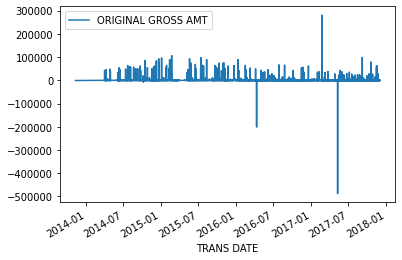

In [ ]:
anomalias.set_index('TRANS DATE', inplace=True)
anomalias.plot()

In [ ]:
anomalias['ORIGINAL GROSS AMT'].sort_values()

TRANS DATE
2017-05-10   -486980.09
2016-04-11   -199741.09
2017-05-10   -105527.58
2017-05-10    -20270.05
2017-05-10    -11340.06
                ...    
2015-01-05     96000.00
2015-07-15     97538.78
2017-09-07     98527.00
2015-02-23    106289.88
2017-02-24    280102.23
Name: ORIGINAL GROSS AMT, Length: 180268, dtype: float64

In [ ]:
anomalias = anomalias[(anomalias['ORIGINAL GROSS AMT']!=-486980.09) & (anomalias['ORIGINAL GROSS AMT']!=-199741.09) & (anomalias['ORIGINAL GROSS AMT']!=280102.23) & (anomalias['ORIGINAL GROSS AMT']!=-105527.58)]
anomalias

,ORIGINAL GROSS AMT
TRANS DATE,
2013-11-12,-594.00
2014-03-06,98.33
2014-03-27,-10.54
2014-04-01,94.93
2014-04-02,79.88
...,...
2017-11-30,29.41
2017-11-30,596.95
2017-12-01,7.38


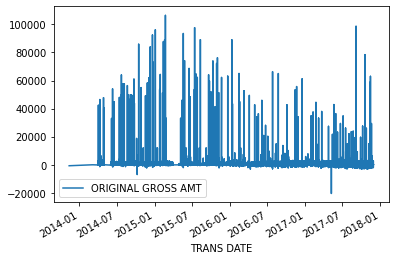

In [ ]:
anomalias.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


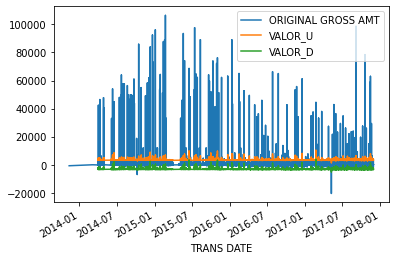

In [ ]:
anomalias['VALOR_U'] =  anomalias['ORIGINAL GROSS AMT'].rolling(window=30).mean() + (2*anomalias['ORIGINAL GROSS AMT'].std())
anomalias['VALOR_D'] = anomalias['ORIGINAL GROSS AMT'].rolling(window=30).mean() - (2*anomalias['ORIGINAL GROSS AMT'].std())
anomalias.plot()